# Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle
import json
import warnings
warnings.filterwarnings('ignore')


# Data Collection

In [3]:
df=pd.read_csv("/content/Placement_Data_Full_Class.csv")
df
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Preparation

In [4]:
df.drop('sl_no',axis=1,inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Handling Missing Values

In [5]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.fillna(value = 0, inplace =True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Feature Selection

<Axes: xlabel='gender', ylabel='count'>

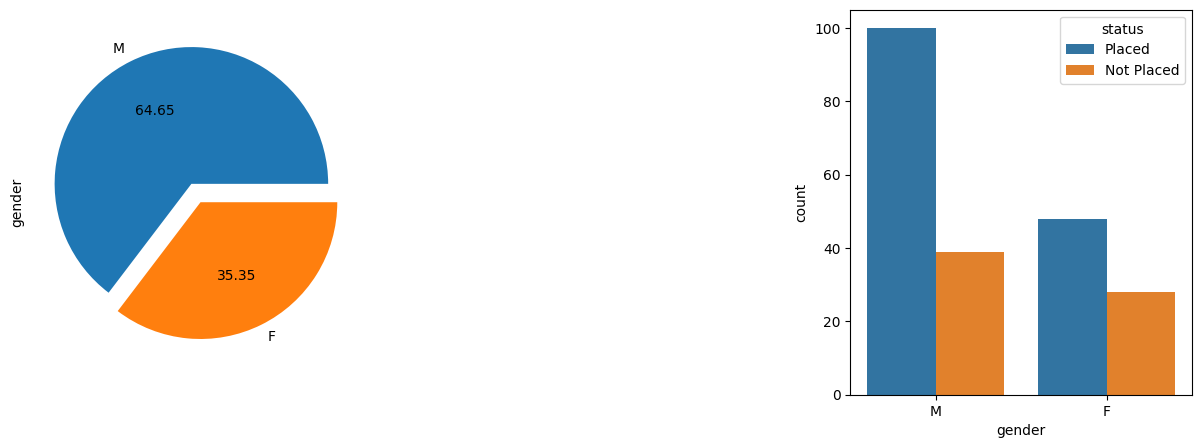

In [117]:
plt.figure(figsize = (15,5))
explode = [0.15,0]
plt.subplot(131)
df['gender'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(133)
sns.countplot(data=df,x='gender',hue='status')

In [9]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

Text(0.5, 0, 'workex (100k)')

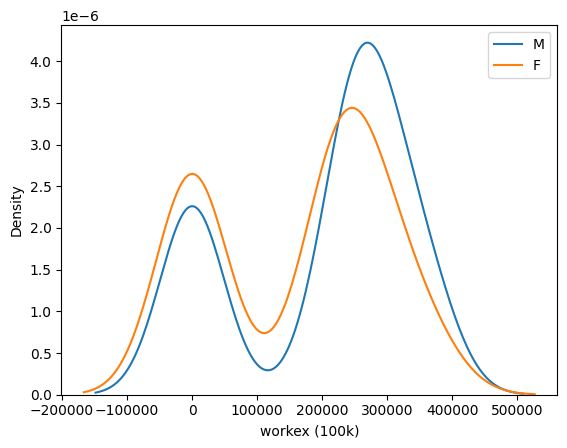

In [115]:
sns.kdeplot(df.salary[df.gender=='M'])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<Axes: xlabel='salary', ylabel='gender'>

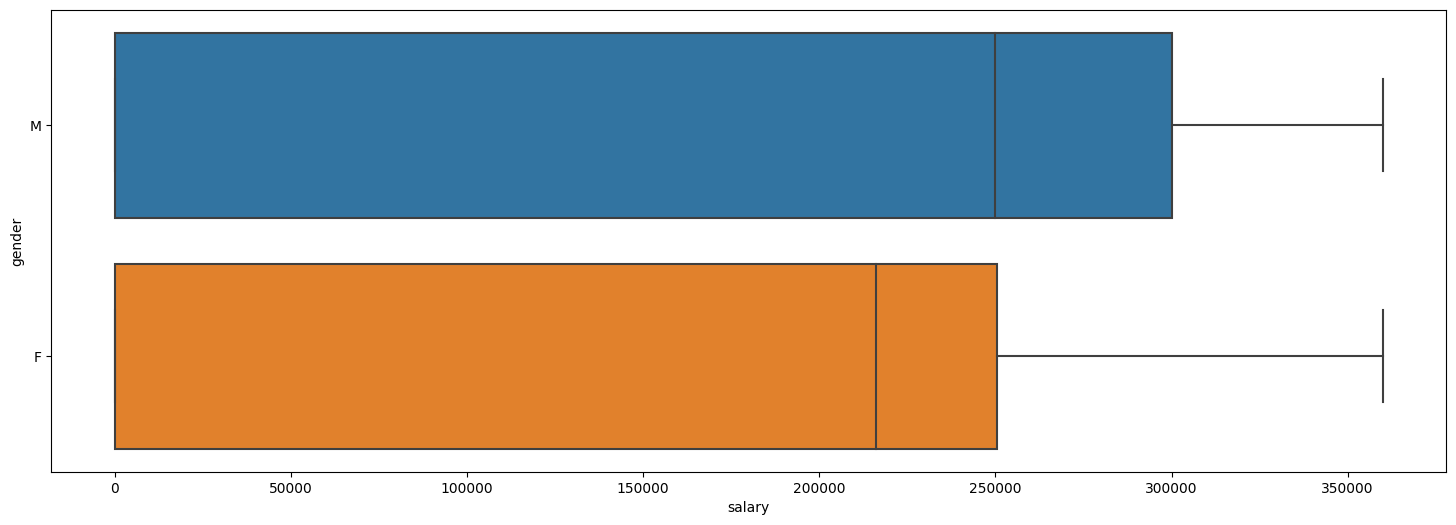

In [119]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary",y="gender",data=df)

In [12]:
df.gender[df.status=="Not Placed"].value_counts()


M    39
F    28
Name: gender, dtype: int64

### Secondary Education

<Axes: xlabel='ssc_b', ylabel='count'>

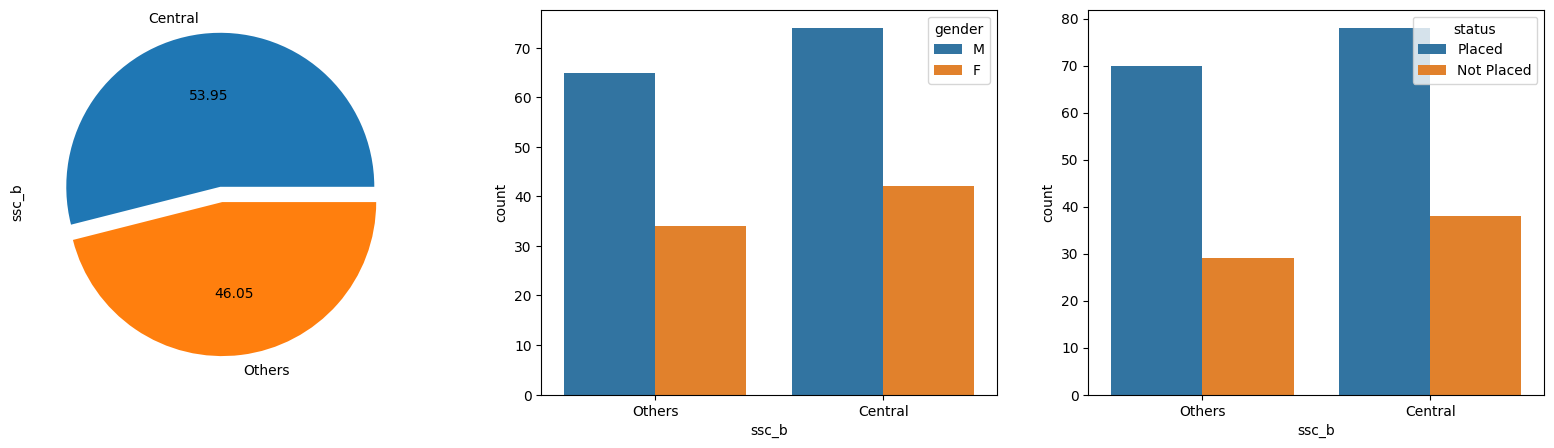

In [13]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['ssc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'ssc_b',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'ssc_b',hue =df['status'])

Text(0.5, 0, 'Secondary Education Percentage')

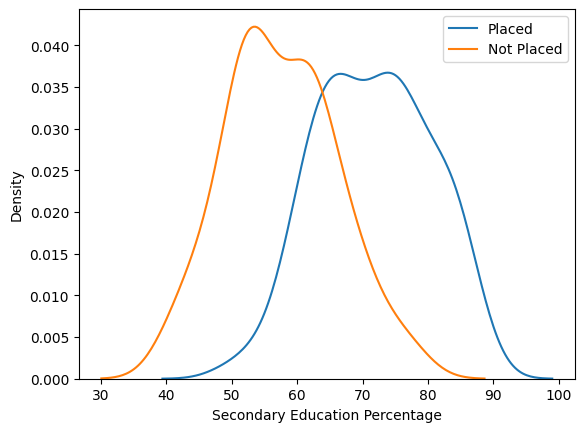

In [14]:
sns.kdeplot(df.ssc_p[df.status=='Placed'])
sns.kdeplot(df.ssc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Secondary Education Percentage')


<Axes: xlabel='salary', ylabel='ssc_b'>

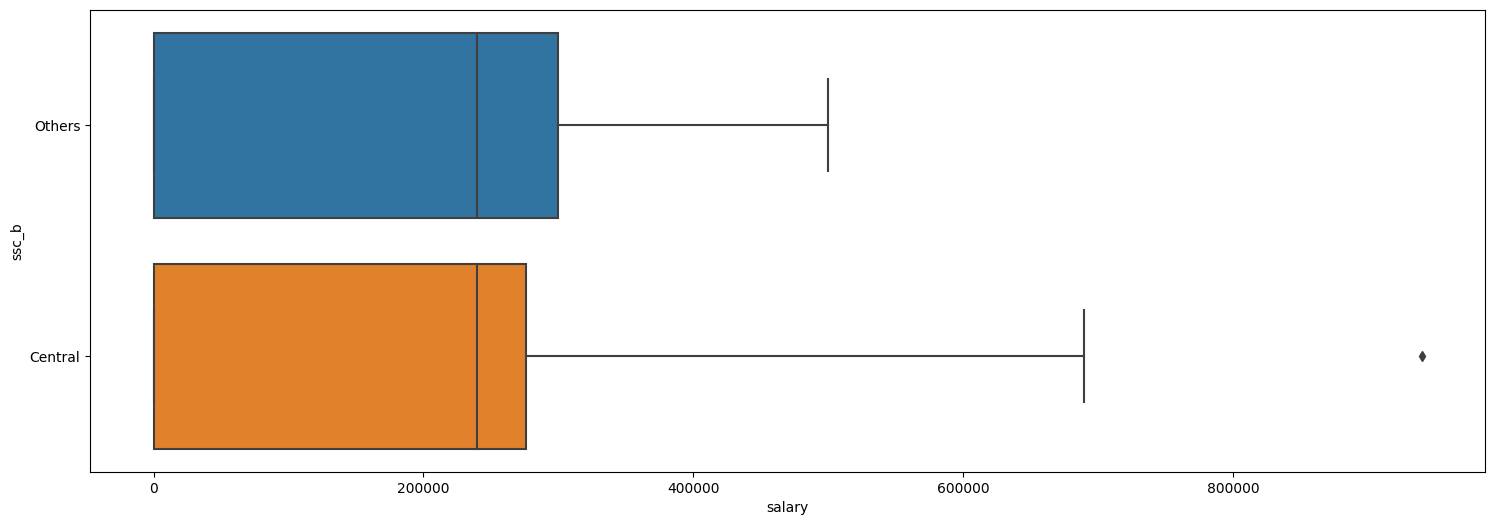

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='ssc_b',data=df)

<Axes: xlabel='ssc_p', ylabel='salary'>

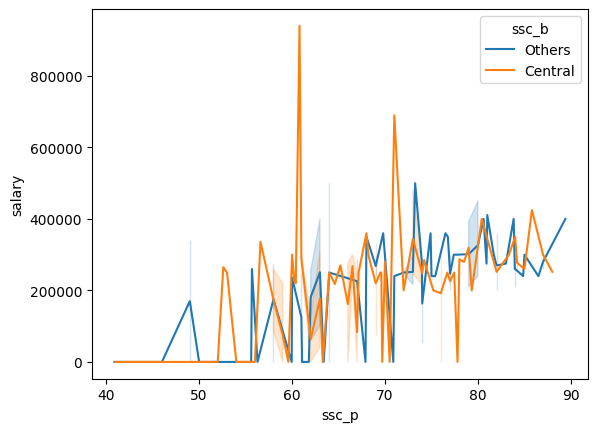

In [16]:
sns.lineplot(x="ssc_p",y="salary",hue='ssc_b',data=df)

### Higher Secondary Education

KeyError: ignored

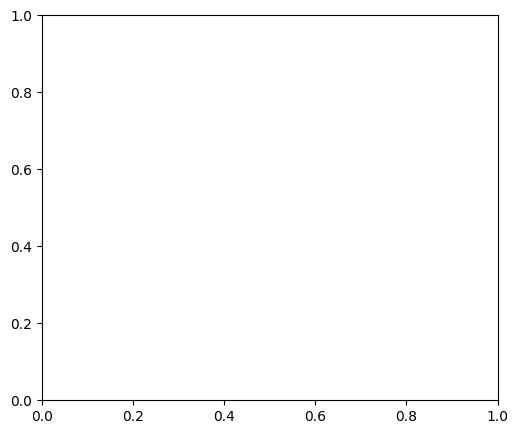

In [120]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['hsc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_b',hue =df['gender'])


<Axes: xlabel='hsc_s', ylabel='count'>

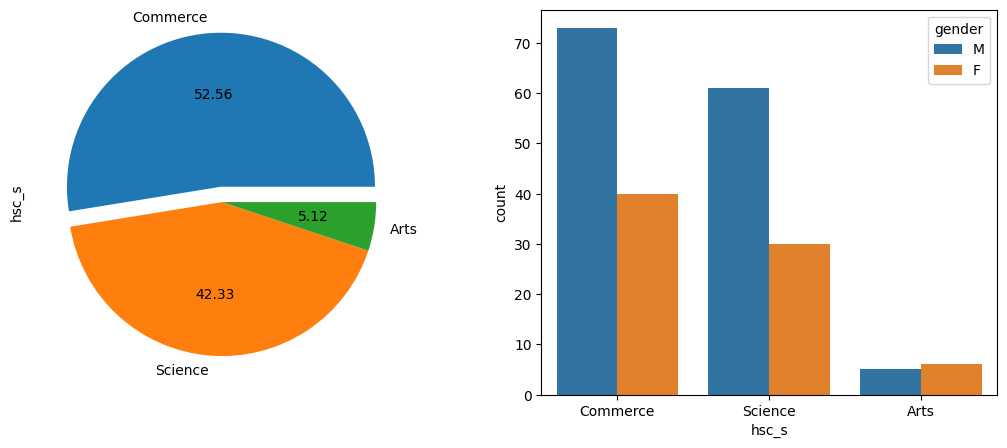

In [121]:
plt.figure(figsize = (20,5))
explode = [0.1,0,0]
plt.subplot(131)
df['hsc_s'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_s',hue =df['gender'])


Text(0.5, 0, 'Higher Secondary Education Percentage')

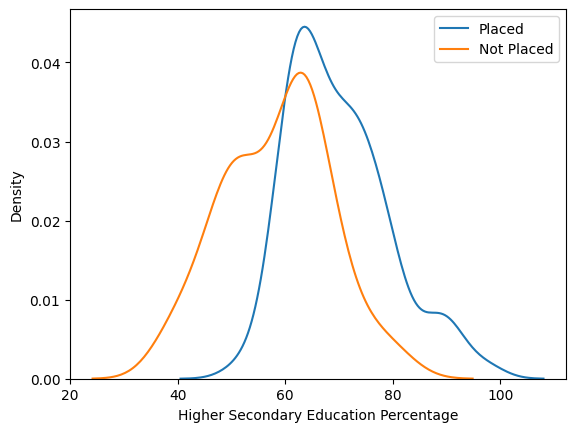

In [19]:
sns.kdeplot(df.hsc_p[df.status=='Placed'])
sns.kdeplot(df.hsc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Higher Secondary Education Percentage")

<Axes: xlabel='salary', ylabel='hsc_b'>

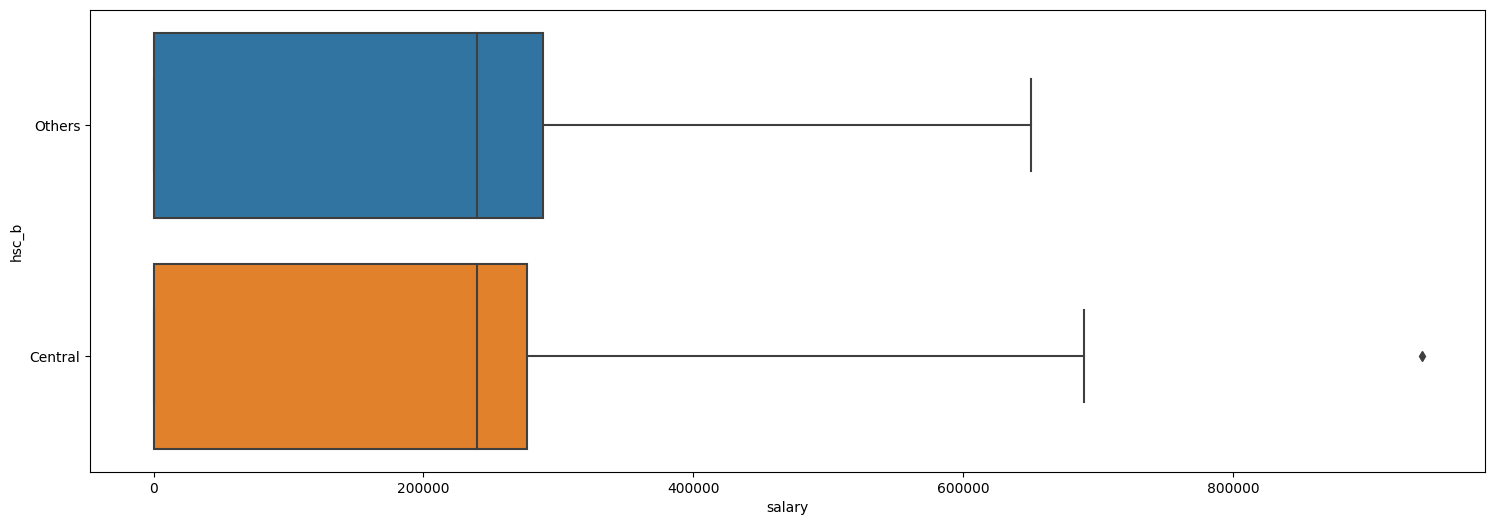

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_b',data=df)

<Axes: xlabel='salary', ylabel='hsc_s'>

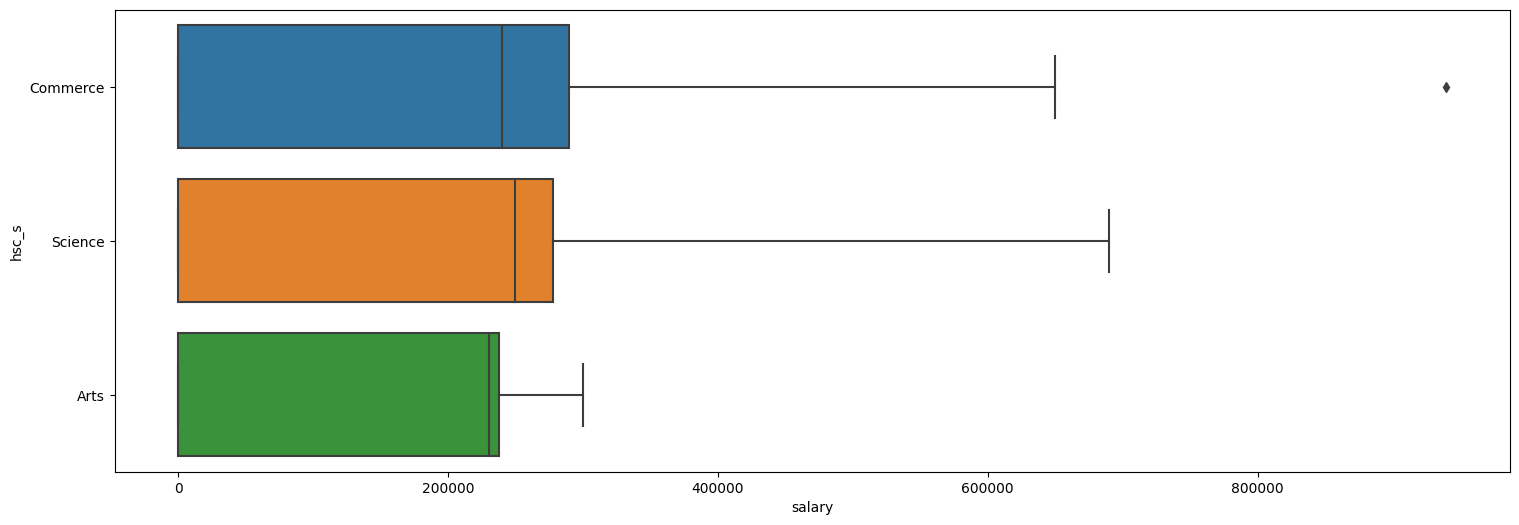

In [21]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_s',data=df)

<Axes: xlabel='hsc_p', ylabel='salary'>

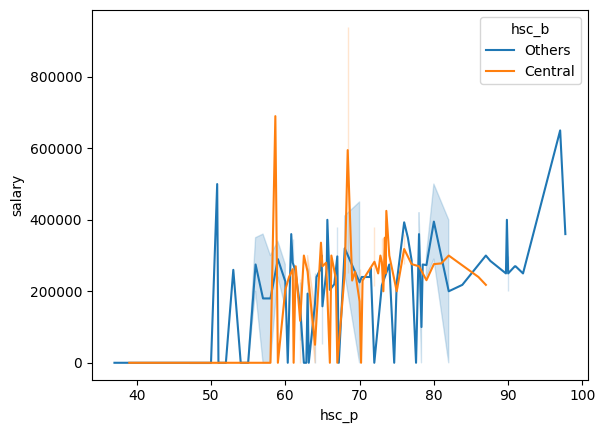

In [22]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_b',data=df)

<Axes: xlabel='hsc_p', ylabel='salary'>

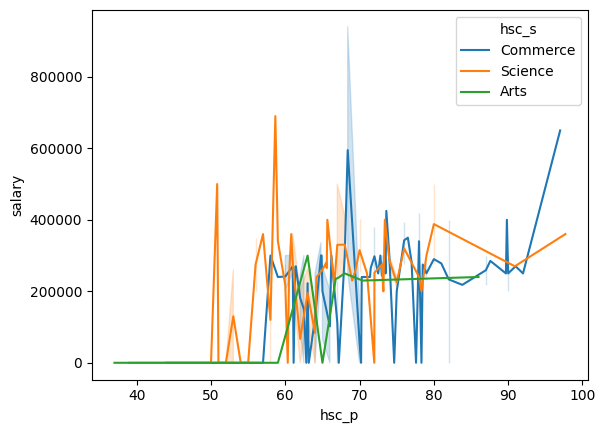

In [23]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_s',data=df)

### Under Graduation

<Axes: xlabel='degree_t', ylabel='count'>

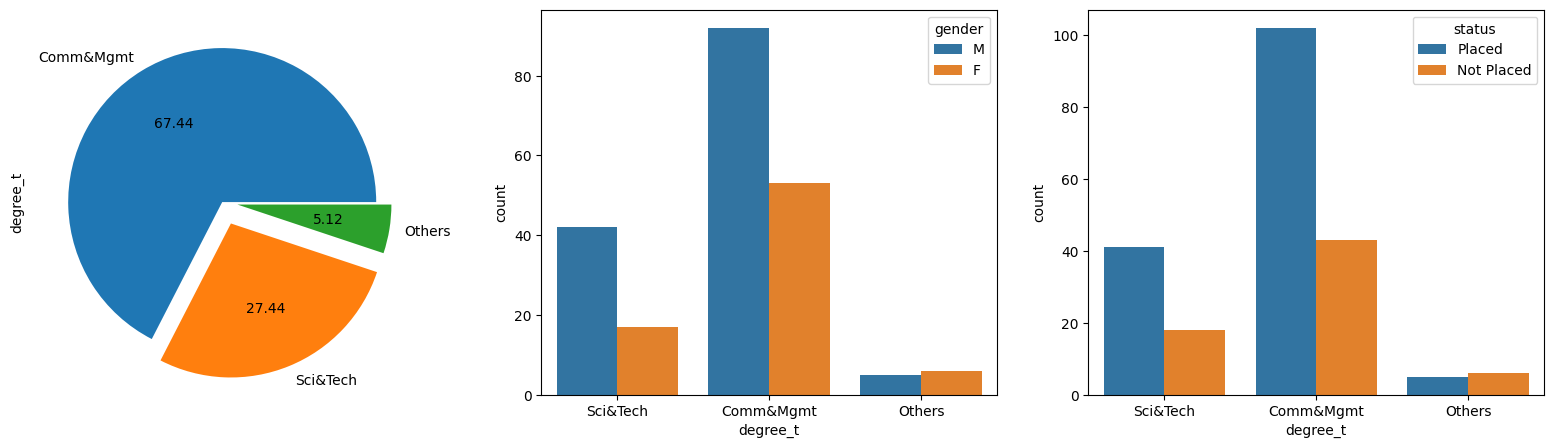

In [24]:
plt.figure(figsize = (20,5))
explode = [0,0.15,0.1]
plt.subplot(131)
df['degree_t'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'degree_t',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'degree_t',hue =df['status'])

Text(0.5, 0, 'Under Graduate Percentage')

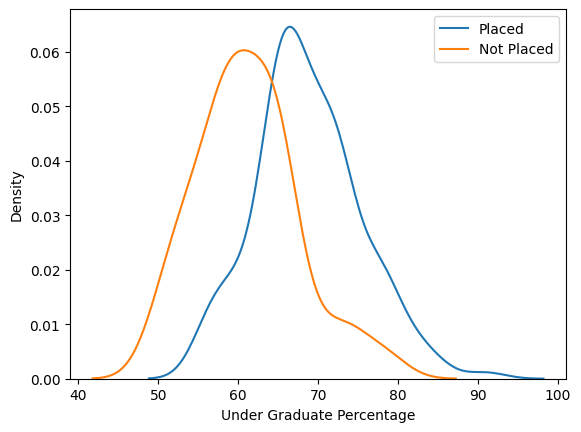

In [25]:
sns.kdeplot(df.degree_p[df.status=='Placed'])
sns.kdeplot(df.degree_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Under Graduate Percentage")

<Axes: xlabel='salary', ylabel='degree_t'>

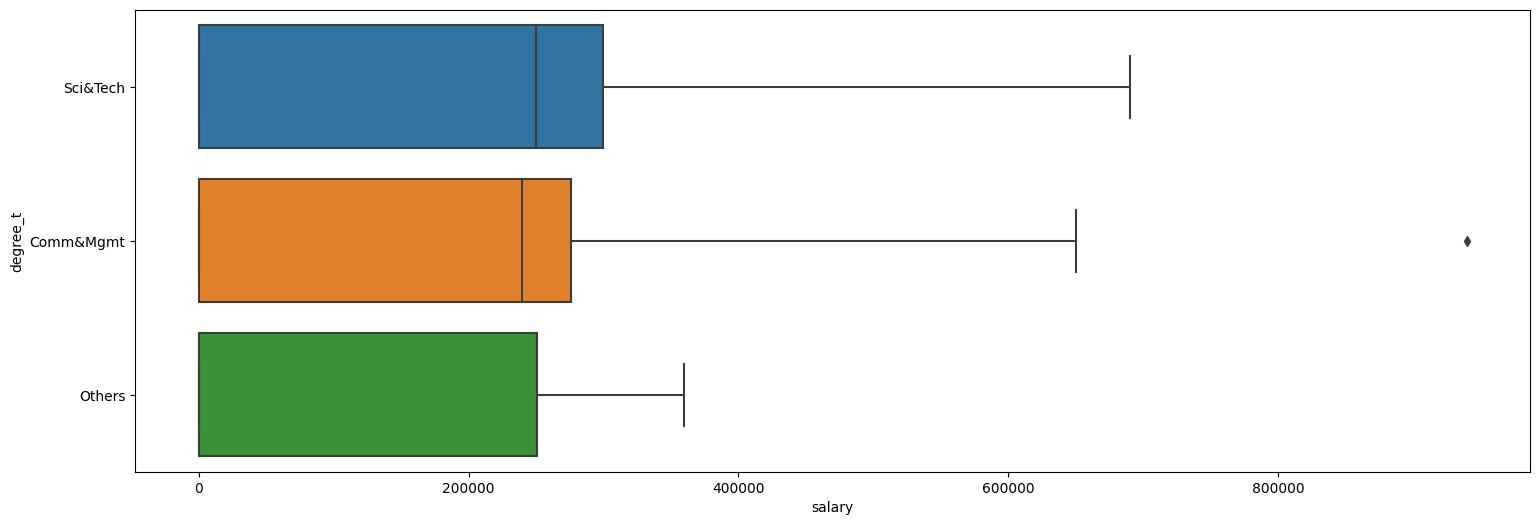

In [26]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='degree_t')

<Axes: xlabel='degree_p', ylabel='salary'>

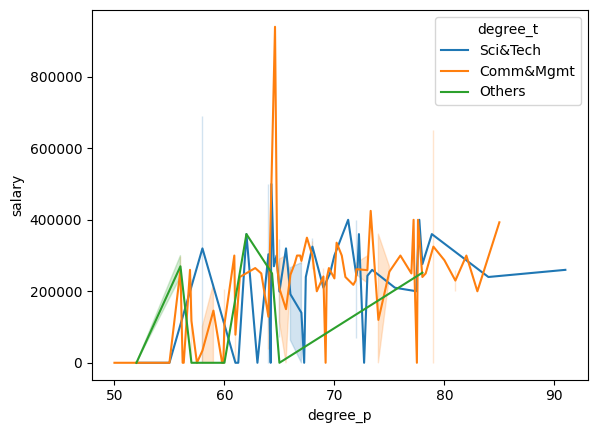

In [27]:
sns.lineplot(data=df,x='degree_p',y='salary',hue='degree_t')

### Post Graduation

<Axes: xlabel='specialisation', ylabel='count'>

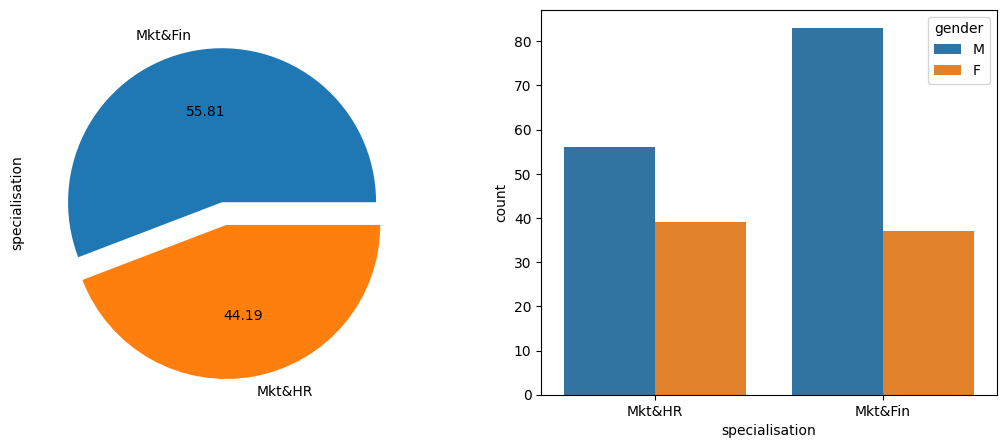

In [122]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['specialisation'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'specialisation',hue =df['gender'])

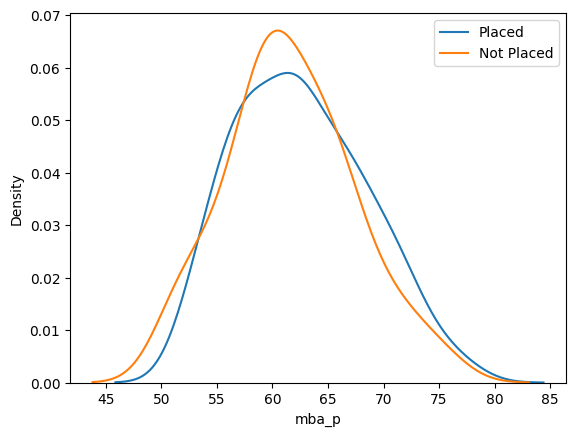

In [29]:
sns.kdeplot(df.mba_p[df.status=="Placed"])
sns.kdeplot(df.mba_p[df.status=="Not Placed"])
plt.legend(['Placed','Not Placed'])

<Axes: xlabel='salary', ylabel='specialisation'>

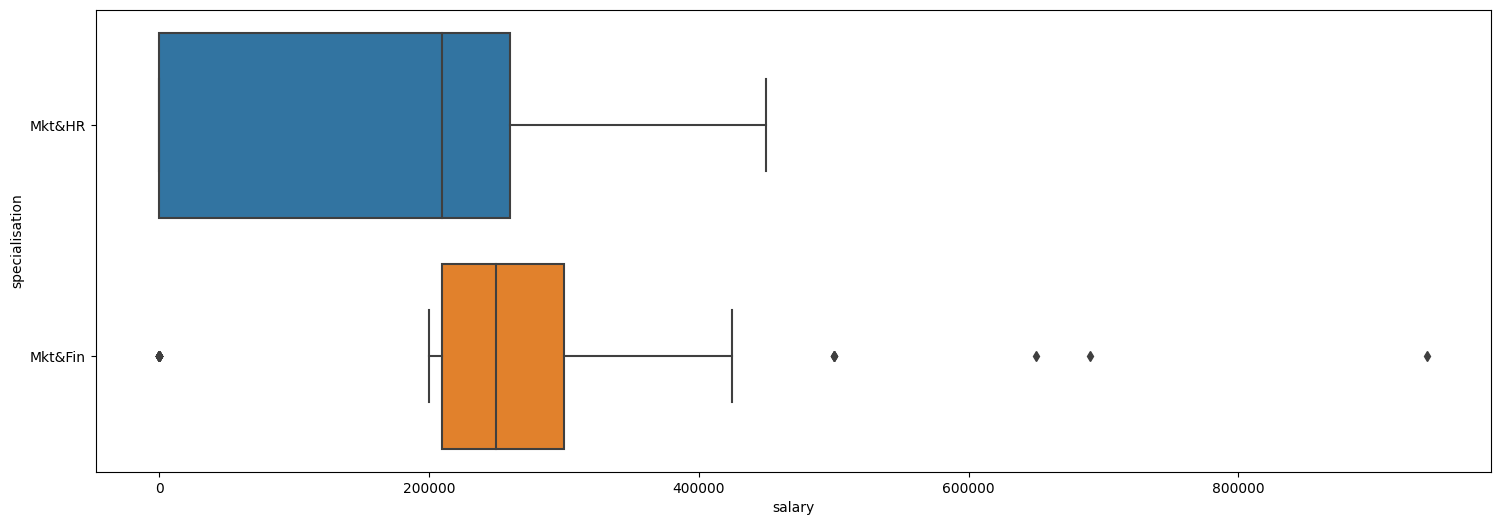

In [30]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='specialisation')

### Work Experience

<Axes: xlabel='workex', ylabel='count'>

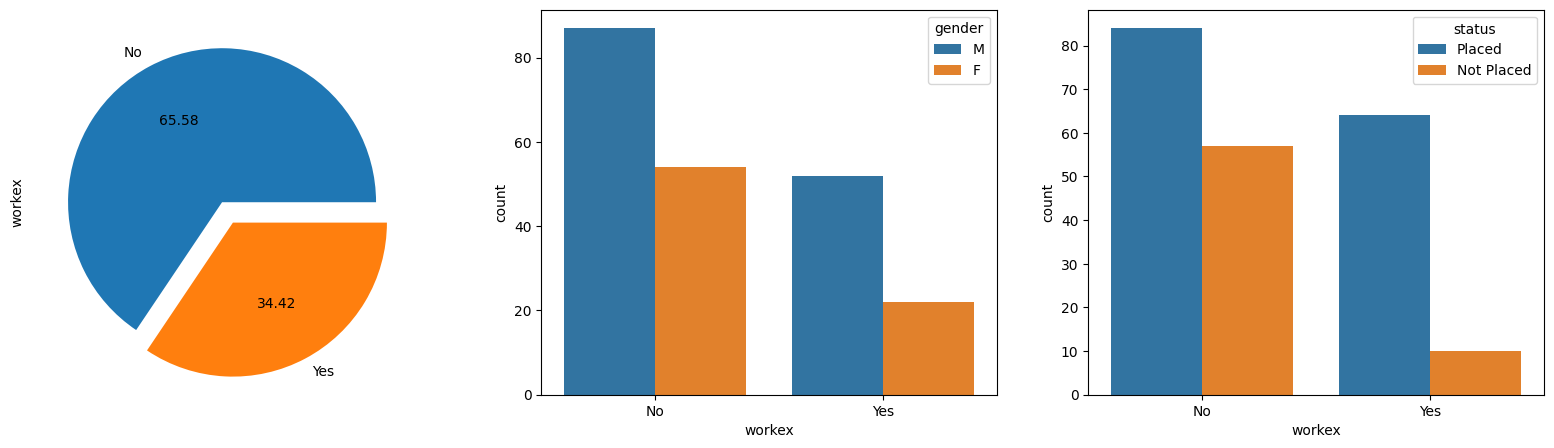

In [32]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['workex'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'workex',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'workex',hue =df['status'])

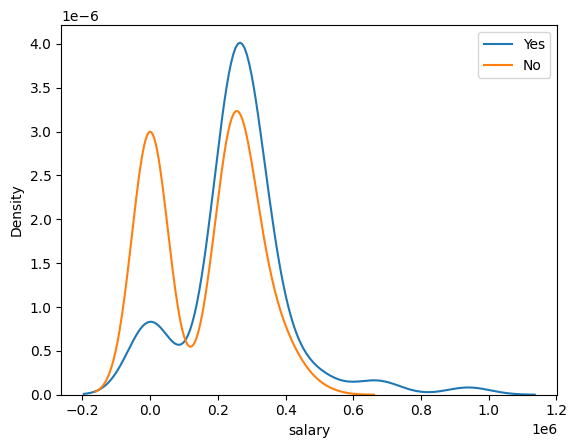

In [33]:
sns.kdeplot(df.salary[df.workex=='Yes'])
sns.kdeplot(df.salary[df.workex=='No'])
plt.legend(['Yes','No'])

<Axes: xlabel='salary', ylabel='workex'>

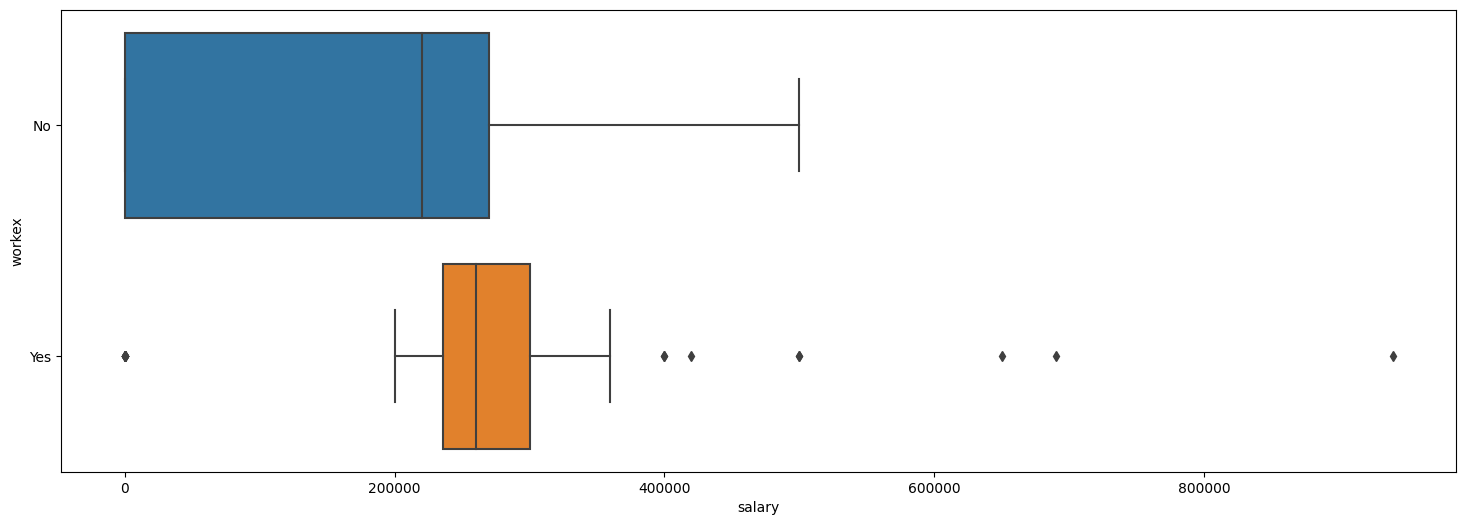

In [34]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='workex')

### Placement Status

<Axes: xlabel='status', ylabel='count'>

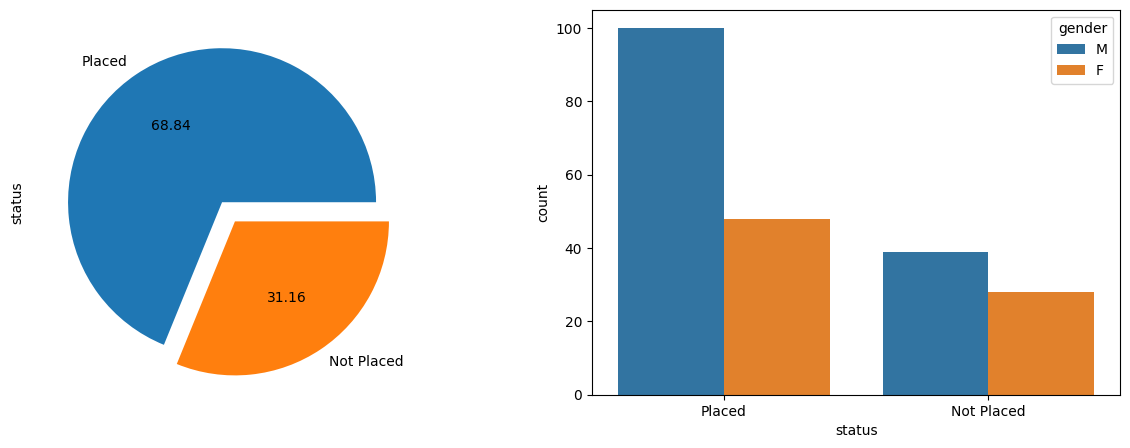

In [35]:
plt.figure(figsize = (15,5))
explode = [0,0.15]
plt.subplot(121)
df['status'].value_counts().plot(kind ='pie',autopct = '%.2f',explode =explode)
plt.subplot(122)
sns.countplot(data = df, x = 'status', hue = df['gender'])

<Axes: >

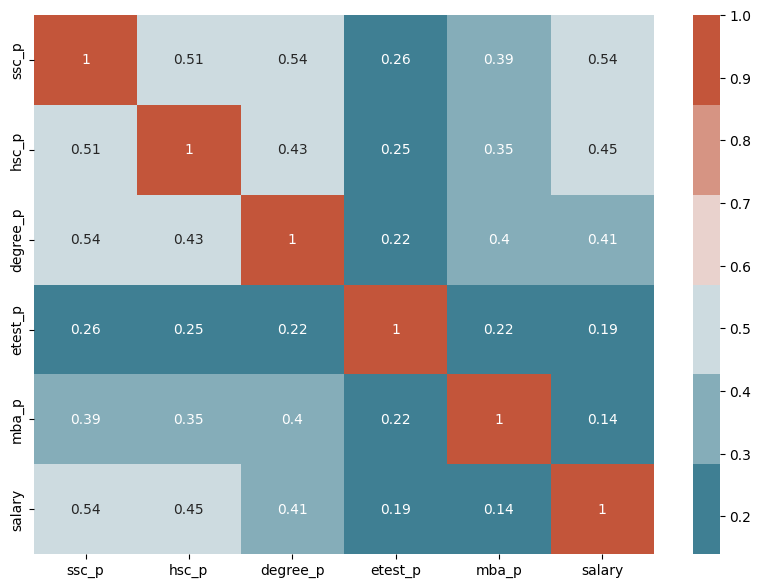

In [36]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 20)
sns.heatmap(corr, annot=True, cmap=cmap)

<Axes: xlabel='degree_p', ylabel='hsc_p'>

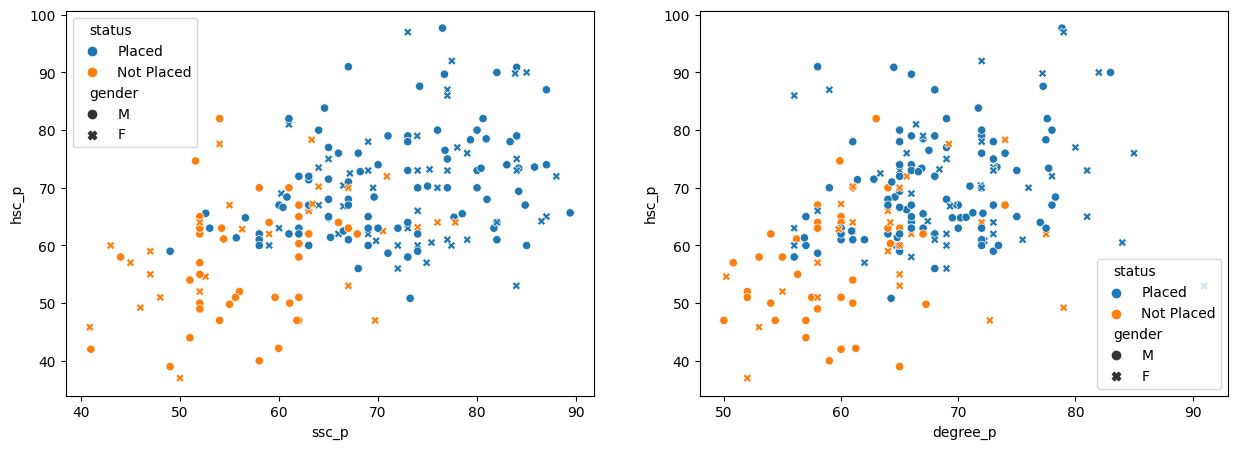

In [37]:
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(data =df, x ='ssc_p' , y='hsc_p',hue = 'status',style = 'gender')
plt.subplot(122)
sns.scatterplot(data =df, x ='degree_p' , y='hsc_p',hue = 'status',style = 'gender')

### Employability Test Percentage

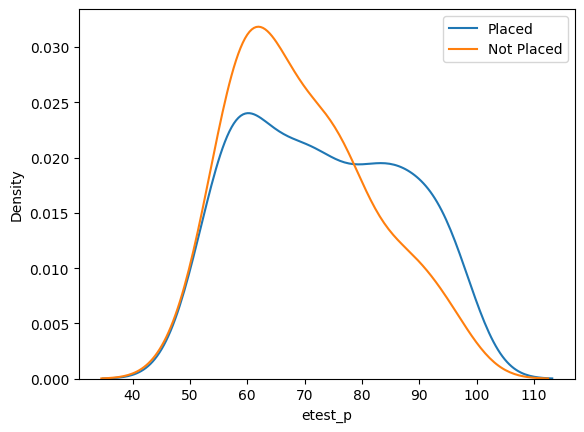

In [38]:
sns.kdeplot(df.etest_p[df.status=='Placed'])
sns.kdeplot(df.etest_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])

<Axes: xlabel='etest_p', ylabel='salary'>

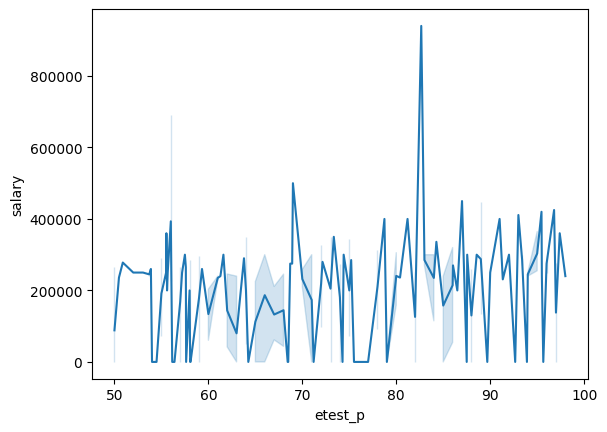

In [39]:
sns.lineplot(data=df,x='etest_p',y='salary')

In [41]:
df.drop(['ssc_b','hsc_b'],axis=1,inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [42]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

# Data Pre-processing

In [43]:
numcol=df.select_dtypes(include =["float64"])
numcol

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


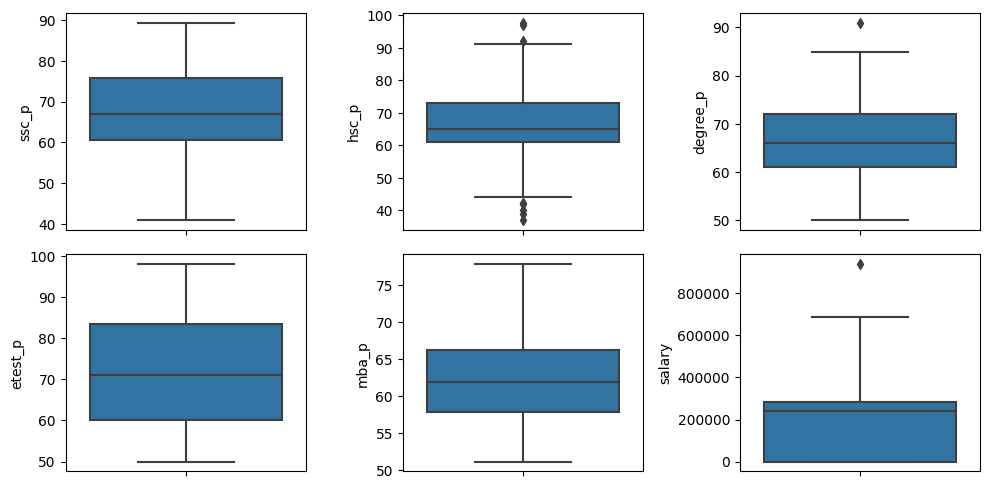

In [44]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

In [45]:
for i in numcol:
    df[i]= winsorize(df[i],limits=[0.1,0.1])

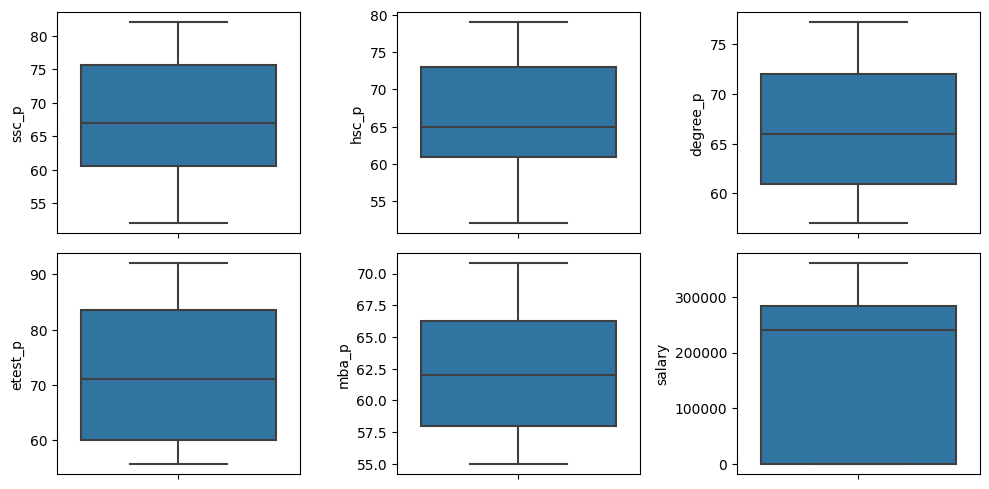

In [46]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

## Handling Categorical Values (One Hot Encoding)

In [47]:
cat_col = df.select_dtypes(include =["object"])
cat_col

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...
210,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [48]:
data = pd.get_dummies(df , columns = cat_col.columns ,drop_first=False)
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,0,1


In [49]:
data_final=data.drop('status_Not Placed',axis=1)
data_final

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


## Binary Classification Problem

In [50]:
data_clf=data_final.copy()
data_clf

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


### Splitting Dataset

In [51]:
X=data_clf.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,57.0,66.00,59.43,0,1,0,0,1,0,0,1,1,0,0,1
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.0,70.00,60.23,1,0,0,1,0,1,0,0,1,0,0,1


#### Dependent Variable

In [52]:
y=data_clf['status_Placed']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status_Placed, Length: 215, dtype: uint8

#### Train and Test Data

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [54]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
70,82.0,61.0,62.0,89.00,65.45,0,1,0,0,1,0,0,1,1,0,1,0
38,73.0,58.0,66.0,55.67,56.86,1,0,0,0,1,1,0,0,1,0,0,1
208,52.0,60.0,65.0,92.00,62.92,1,0,0,0,1,1,0,0,1,0,0,1
90,82.0,79.0,77.2,92.00,68.03,1,0,0,1,0,1,0,0,1,0,1,0
176,59.0,60.0,57.0,55.67,57.90,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,69.0,78.0,72.0,71.00,62.74,1,0,0,1,0,1,0,0,1,0,0,1
136,52.0,59.0,64.0,78.00,61.58,1,0,1,0,0,1,0,0,1,0,1,0
14,62.0,52.0,57.0,76.00,54.97,0,1,0,1,0,1,0,0,1,0,0,1
159,52.0,52.0,58.0,62.00,60.59,0,1,0,1,0,1,0,0,1,0,0,1


In [55]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
72,82.00,67.00,77.2,92.00,68.53,0,1,0,0,1,1,0,0,1,0,1,0
155,52.00,74.66,59.9,56.15,65.99,0,1,0,1,0,1,0,0,0,1,0,1
58,74.00,62.00,68.0,74.00,57.99,0,1,0,0,1,1,0,0,1,0,1,0
104,69.00,63.00,65.0,55.67,58.23,0,1,0,0,1,1,0,0,0,1,0,1
172,73.00,58.00,57.0,84.00,54.97,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,75.20,73.20,68.4,65.00,62.98,1,0,0,0,1,1,0,0,1,0,0,1
31,67.00,53.00,65.0,64.00,58.32,1,0,0,0,1,0,0,1,1,0,0,1
56,63.00,71.40,61.4,68.00,66.88,0,1,0,1,0,1,0,0,1,0,1,0
113,73.96,79.00,67.0,72.15,63.08,1,0,0,1,0,1,0,0,1,0,1,0


In [56]:
y_train

70     1
38     1
208    0
90     1
176    1
      ..
35     1
136    0
14     0
159    0
20     1
Name: status_Placed, Length: 150, dtype: uint8

In [57]:
y_test

72     1
155    0
58     1
104    1
172    1
      ..
50     1
31     0
56     1
113    1
131    1
Name: status_Placed, Length: 65, dtype: uint8

### Model Building

#### Ada Boost Classifier

In [58]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [59]:
y_pred = abc.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=uint8)

In [60]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", abc.score (X_train, y_train), "\nTest score:",abc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, abc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.92      0.92      0.92        51

    accuracy                           0.88        65
   macro avg       0.82      0.82      0.82        65
weighted avg       0.88      0.88      0.88        65

Confusion Matrix
 [[10  4]
 [ 4 47]]

Train score: 1.0 
Test score: 0.8769230769230769

Accuracy Score: 87.69%


#### Random Forest Classifier

In [61]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=uint8)

In [63]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", rfc.score (X_train, y_train), "\nTest score:",rfc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.91      0.94      0.92        51

    accuracy                           0.88        65
   macro avg       0.83      0.79      0.81        65
weighted avg       0.87      0.88      0.87        65

Confusion Matrix
 [[ 9  5]
 [ 3 48]]

Train score: 1.0 
Test score: 0.8769230769230769

Accuracy Score: 87.69%


In [64]:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [65]:
rfc_best_model = rfc_cv.best_estimator_
rfc_best_model

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [66]:
predictions = rfc_best_model.predict(X)
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [67]:
print("Classification Report:\n")
print(classification_report(y, predictions))
print("\nBest Hyperparameters: ", rfc_cv.best_params_)
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc_cv.predict(X_test)) * 100.0))
print("Best Score: %.2f%%" % (rfc_cv.best_score_ * 100.0))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.92      0.97      0.95       148

    accuracy                           0.93       215
   macro avg       0.93      0.90      0.91       215
weighted avg       0.93      0.93      0.92       215


Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}

Accuracy Score: 89.23%
Best Score: 87.33%


#### Decision Tree Classifier

In [68]:
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_pred=dtc.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=uint8)

In [70]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", dtc.score (X_train, y_train), "\nTest score:",dtc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, dtc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.91      0.84      0.88        51

    accuracy                           0.82        65
   macro avg       0.74      0.78      0.75        65
weighted avg       0.84      0.82      0.82        65

Confusion Matrix
 [[10  4]
 [ 8 43]]

Train score: 1.0 
Test score: 0.8153846153846154

Accuracy Score: 81.54%


#### K Nearest Neighbors Classifier

In [71]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knc.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [73]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", knc.score (X_train, y_train), "\nTest score:",knc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, knc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65

Confusion Matrix
 [[ 9  5]
 [ 1 50]]

Train score: 0.8466666666666667 
Test score: 0.9076923076923077

Accuracy Score: 90.77%


#### XGBoost Classifier

In [74]:
xbc = xgb.XGBClassifier()
xbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
y_pred = xbc.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [76]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", xbc.score (X_train, y_train), "\nTest score:",xbc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, xbc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.92      0.90      0.91        51

    accuracy                           0.86        65
   macro avg       0.79      0.81      0.80        65
weighted avg       0.87      0.86      0.86        65

Confusion Matrix
 [[10  4]
 [ 5 46]]

Train score: 1.0 
Test score: 0.8615384615384616

Accuracy Score: 86.15%


## Regression Problem

In [77]:
data_reg=data_final[data_final['status_Placed'] == 1 ]
data_reg

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
7,82.00,64.00,66.0,67.00,62.14,252000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,216000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1


### Splitting Dataset

<Axes: xlabel='status_Placed', ylabel='Density'>

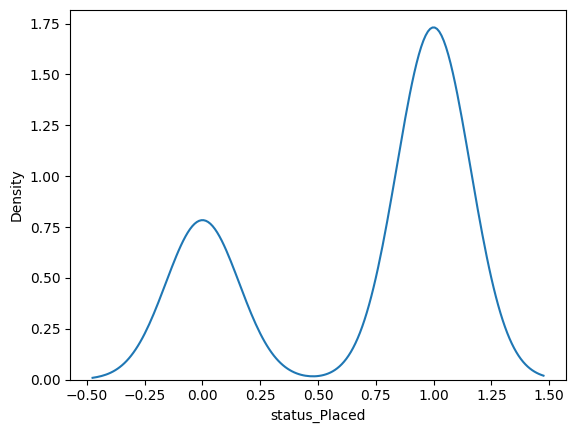

In [78]:
sns.kdeplot(y)

Very few students have salary greater than 400,000 (hence outliers)

#### Independent Variables

In [79]:
X=data_reg[data_reg['salary']<400000]
X=X.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
7,82.00,64.00,66.0,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,0,1,0,1,0,1,0,0,1,0,1,0
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0


#### Dependent Variable

In [80]:
y=data_reg['salary']
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Handling Outliers

In [81]:
y=y[y< 400000]
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Train and Test Data

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [83]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
88,66.00,62.0,73.00,58.00,64.36,1,0,0,1,0,1,0,0,1,0,0,1
28,76.76,76.5,67.50,73.35,64.15,0,1,0,1,0,1,0,0,0,1,1,0
163,63.00,67.0,64.00,75.00,66.46,0,1,0,0,1,0,0,1,1,0,1,0
152,75.40,60.5,77.20,92.00,65.25,1,0,0,0,1,0,0,1,1,0,1,0
174,73.24,52.0,64.27,64.00,66.23,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,65.00,68.0,64.00,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
138,82.00,64.0,73.00,92.00,70.81,1,0,0,0,1,0,0,1,0,1,1,0
185,82.00,72.0,77.20,82.00,70.81,1,0,0,0,1,0,1,0,1,0,0,1
209,62.00,72.0,65.00,67.00,56.49,0,1,0,1,0,1,0,0,1,0,1,0


In [84]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
143,77.67,64.89,70.67,89.00,60.39,0,1,0,1,0,1,0,0,1,0,1,0
62,82.00,64.20,67.40,59.00,59.69,1,0,0,0,1,0,0,1,1,0,1,0
117,77.00,75.00,73.00,80.00,67.05,0,1,0,0,1,0,0,1,1,0,1,0
154,53.00,63.00,60.00,70.00,54.97,0,1,0,0,1,1,0,0,0,1,1,0
203,55.68,61.33,57.00,66.00,58.30,0,1,0,1,0,1,0,0,1,0,0,1
157,66.50,62.50,60.90,92.00,55.03,0,1,0,1,0,1,0,0,1,0,1,0
78,82.00,79.00,64.50,86.04,59.42,0,1,0,0,1,0,0,1,1,0,1,0
40,78.00,77.00,77.20,60.00,66.72,1,0,0,1,0,1,0,0,1,0,1,0
107,82.00,79.00,77.20,80.00,70.81,0,1,0,1,0,1,0,0,1,0,0,1
191,67.00,61.00,72.00,72.00,61.01,0,1,0,0,1,1,0,0,1,0,1,0


In [85]:
y_train

88     210000.0
28     350000.0
163    360000.0
152    240000.0
174    360000.0
         ...   
2      250000.0
138    250000.0
185    252000.0
209    216000.0
156    255000.0
Name: salary, Length: 103, dtype: float64

In [86]:
y_test

143    300000.0
62     240000.0
117    240000.0
154    250000.0
203    260000.0
157    300000.0
78     270000.0
40     287000.0
107    200000.0
191    264000.0
11     250000.0
66     275000.0
35     300000.0
1      200000.0
133    250000.0
176    220000.0
76     230000.0
121    250000.0
81     300000.0
23     300000.0
22     360000.0
80     240000.0
55     220000.0
104    360000.0
166    240000.0
126    210000.0
116    300000.0
205    250000.0
131    360000.0
26     240000.0
125    350000.0
128    360000.0
204    210000.0
64     240000.0
32     278000.0
139    220000.0
54     216000.0
94     260000.0
148    240000.0
212    295000.0
48     250000.0
39     360000.0
92     230000.0
98     220000.0
21     360000.0
Name: salary, dtype: float64

### Model Building

#### Linear Regression

In [87]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred=lr.predict(X_test)
y_pred

array([292484.32128654, 267293.09079048, 314994.55410573, 249361.80240855,
       265959.71654842, 284646.66702529, 310036.30852208, 260720.45743365,
       295045.43176337, 262828.79805213, 279760.86696139, 254296.41543393,
       248078.83576277, 314085.87292527, 267978.85651308, 232340.61355983,
       234017.25807655, 263676.32255571, 283171.61965302, 281996.8038903 ,
       263966.59209036, 241172.40010699, 243964.02085641, 240960.36606967,
       258422.82143159, 278217.6388743 , 304653.27635375, 272748.66827472,
       266306.0233786 , 287937.3225024 , 273622.68057779, 307458.83229073,
       266418.9059669 , 279867.74028026, 240077.97547482, 271763.8376314 ,
       233892.78749667, 267007.1080183 , 268260.71473549, 287508.2918536 ,
       281442.33427727, 315082.63903241, 231588.53185501, 250820.79841123,
       277166.07776863])

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  36814.057775817695
Mean Squared Error (MSE):  2365401765.032619
Root Mean Squared Error (RMSE):  48635.39621543777
R-squared (R2) score:  -0.030881333962714086
Accuracy Score: -3.00%


In [90]:
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2210420205.5006256
Standard Deviation MSE: 720838726.846774


#### Random Forest Regression

In [91]:
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [92]:
y_pred = rfr.predict(X_test)
y_pred

array([267695., 262675., 308865., 254380., 248755., 282750., 291350.,
       265765., 332320., 274140., 283285., 285760., 256700., 293860.,
       256915., 253015., 239845., 250735., 289800., 276185., 241995.,
       233155., 260725., 254520., 246970., 268915., 291290., 246410.,
       267285., 295480., 265260., 308330., 241390., 268955., 263010.,
       269700., 250215., 248590., 268800., 263865., 282310., 319980.,
       248000., 249325., 267870.])

In [93]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  37416.0
Mean Squared Error (MSE):  2464478048.888889
Root Mean Squared Error (RMSE):  49643.50963508613
R-squared (R2) score:  -0.0740604222578527
Accuracy Score: -7.00%


In [94]:
scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2197527097.3448277
Standard Deviation MSE: 660917731.6490362


In [95]:
rfr_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
}
rfr_grid_search = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=5)
rfr_grid_search.fit(X_train, y_train)
print(f"Best hyperparameters: {rfr_grid_search.best_params_}")
print(f"Best R2 score: {rfr_grid_search.best_score_:.4f}")

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 score: 0.0178


In [96]:
scores = cross_val_score(rfr_grid_search, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2242747530.7931952
Standard Deviation MSE: 660298281.335042


#### Decision Tree Regression

In [97]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
y_pred = dtr.predict(X_test)
y_pred

array([265000., 240000., 285000., 204000., 220000., 300000., 231000.,
       280000., 360000., 268000., 290000., 275000., 280000., 240000.,
       270000., 240000., 250000., 236000., 280000., 300000., 260000.,
       300000., 265000., 225000., 250000., 250000., 300000., 250000.,
       300000., 360000., 200000., 300000., 200000., 270000., 280000.,
       270000., 200000., 225000., 218000., 236000., 350000., 300000.,
       200000., 200000., 300000.])

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  40977.77777777778
Mean Squared Error (MSE):  3258844444.4444447
Root Mean Squared Error (RMSE):  57086.28946116961
R-squared (R2) score:  -0.4202584769017206
Accuracy Score: -42.00%


In [100]:
scores = cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 5085850574.712644
Standard Deviation MSE: 1525510621.3624177


####  K - Nearest Neighbour Regression

In [101]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
y_pred = knr.predict(X_test)
y_pred

array([267200., 274400., 287400., 259000., 259000., 263800., 293000.,
       260000., 311400., 281600., 259000., 267000., 295000., 299200.,
       254000., 287000., 252200., 259200., 302000., 269200., 237000.,
       240600., 250200., 259000., 252000., 286400., 280000., 259000.,
       288800., 276800., 324400., 286400., 297400., 254000., 262200.,
       277000., 286000., 258000., 271600., 254200., 247000., 279200.,
       290200., 275200., 299200.])

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  38982.22222222222
Mean Squared Error (MSE):  2598404444.4444447
Root Mean Squared Error (RMSE):  50974.54702539734
R-squared (R2) score:  -0.13242776743535378
Accuracy Score: -13.00%


In [104]:
scores = cross_val_score(knr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2602240174.7126436
Standard Deviation MSE: 324263023.4849141


#### XGBoost Regression

In [105]:
xbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [106]:
y_pred = xbr.predict(X_test)
y_pred

array([232088.8 , 271537.78, 327839.25, 233565.69, 231689.28, 286168.25,
       320529.78, 267862.9 , 369731.16, 243636.78, 297229.  , 276329.75,
       269622.6 , 277979.22, 250035.64, 206082.66, 259175.83, 216626.14,
       264521.6 , 327676.66, 227159.9 , 241538.39, 254593.16, 261049.69,
       252217.45, 257504.69, 293556.56, 253568.61, 284554.5 , 302423.53,
       253449.36, 291999.53, 214208.92, 281911.25, 252825.62, 263254.62,
       236260.44, 253109.  , 262260.03, 264931.88, 299102.06, 350639.3 ,
       245772.22, 218912.94, 299983.9 ], dtype=float32)

In [107]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  39369.834375
Mean Squared Error (MSE):  2828136685.7597275
Root Mean Squared Error (RMSE):  53180.2283349717
R-squared (R2) score:  -0.2325488897251553
Accuracy Score: -23.00%


In [108]:
scores = cross_val_score(xbr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 3008922990.0531907
Standard Deviation MSE: 692020284.8927656


# Prediction Result

In [109]:
def predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1
    salary=round((lr.predict([x])[0])/100000,2)
    print("Estimated Salary is:",salary,"LPA")
def predict_status(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1
    print(x)
    status=rfc_cv.predict([x])[0]
    if(status==1):
        print("The Student is Placed")
        predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p)
    else:
        print("The Student is Not Placed")

In [110]:
predict_status('gender_M',67.00,91.00,'hsc_s_Commerce',58.00,'degree_t_Sci&Tech','workex_No',55.0,'specialisation_Mkt&HR',58.80)

[67.  91.  58.  55.  58.8  0.   1.   0.   1.   0.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Placed
Estimated Salary is: 3.05 LPA


In [111]:
predict_status('gender_M',56.00,52.00,'hsc_s_Science',52.00,'degree_t_Sci&Tech','workex_No',66.0,'specialisation_Mkt&HR',58.80)

[56.  52.  52.  66.  58.8  0.   1.   0.   0.   1.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Not Placed


# Model Deployment

In [112]:
with open("status_rfccv.pickle","wb") as f:
    pickle.dump(rfc_cv,f)

In [113]:
with open("salary_lr.pickle","wb") as f:
    pickle.dump(lr,f)